### Importing Libraries

In [102]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Merging the all month data

In [3]:
path = input('Enter your path: ')

In [4]:
filename = input('Enter the File Name for Merged Data: ')

In [106]:
files = [file for file in os.listdir(path)]
all_months_data = pd.DataFrame()

for file in files:
    all_months_data = pd.concat([all_months_data,pd.read_csv(path +'\\'+ file)])  

all_months_data.to_csv(path+'\\'+filename+'.csv',index = False)

In [107]:
#Read the merged data
all_data = pd.read_csv (path+'\\'+filename+'.csv')

### Cleaning the data & Adding the required columns

In [ ]:
all_data = all_data.dropna(how='all')

In [120]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1]

In [123]:
all_data = all_data[all_data['Month'] != 'Or']

In [124]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [125]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\admin\AppData\Local\Temp\ipykernel_13244\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [126]:
#Sales Column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

### Question 1: What was the best month for sales ? How much was earned that month ?


In [130]:
results = all_data.groupby('Month').sum('Sales')

### Plotting Values

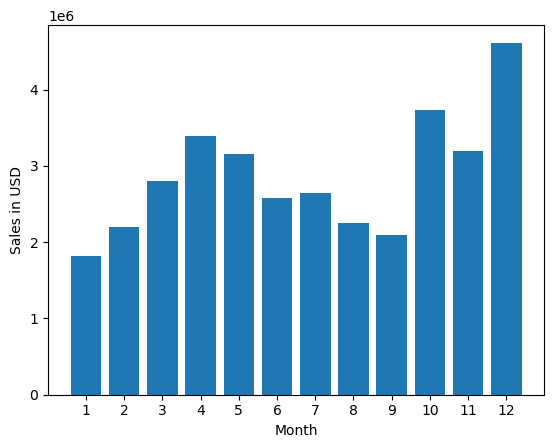

In [133]:
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

#### Ans : December was the best month for sales & More the 4 Billion were earned on that month

### Question 2: Which city had the highest number of sales ?

In [134]:
cities = all_data.groupby('City').sum('Sales')
cities.sort_values('Sales', ascending = False)

,Quantity Ordered,Price Each,Sales
City,,,
San Francisco,50239,8211461.74,8262203.91
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Boston,22528,3637409.77,3661642.01
Atlanta,16602,2779908.20,2795498.58
Dallas,16730,2752627.82,2767975.40
Seattle,16553,2733296.01,2747755.48
Portland,14053,2307747.47,2320490.61
Austin,11153,1809873.61,1819581.75


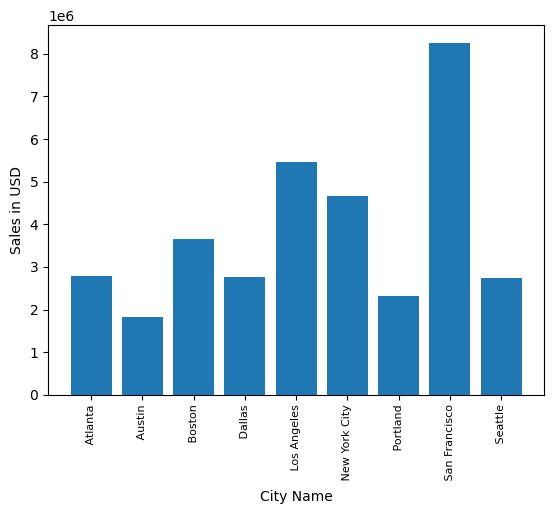

In [135]:
results = all_data.groupby('City')['Sales'].sum().reset_index()

cities = results['City']
sales = results['Sales']

plt.bar(cities, sales)
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.show()

#### Ans: San Francisco has the highest sales

### Question 3: What time should we display advertisements to maximise the sales 

In [136]:
all_data['Hour'] = all_data['Order Date'].dt.hour

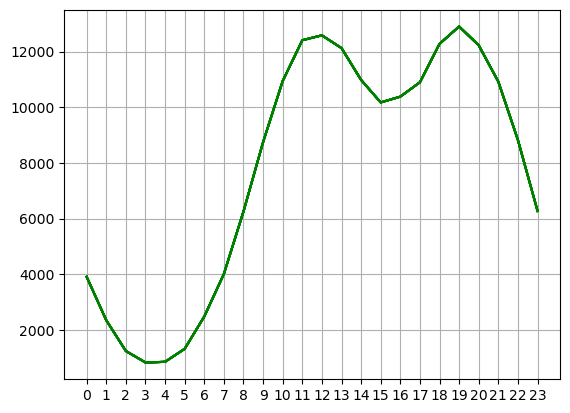

In [61]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count(),color='green')
plt.xticks(hours)
plt.grid()
plt.show()

#### Ans: 12.00 & 19.00 were the best time for advertisments

### Question 4: What products are most sold together ?  

In [69]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_13244\4216696774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [70]:
df = df[['Order ID','Grouped']].drop_duplicates()

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 1005)]

#### Ans: iPhone, Lightning Charging Cable are sold together 1005 times

### Question 5: What product sold the most ?

In [73]:
sold_most = all_data.groupby(['Product','Hour']).sum('Quantity Ordered')
sold_most.sort_values('Quantity Ordered',ascending = False)

Quantity Ordered  Price Each    Sales
Product                Hour                                       
AAA Batteries (4-pack) 19                2296     4547.79  6865.04
                       11                2127     4153.11  6359.73
                       13                2086     4203.94  6237.14
                       12                2041     4072.38  6102.59
                       18                2023     4084.34  6048.77
...                                       ...         ...      ...
LG Dryer               3                    4     2400.00  2400.00
LG Washing Machine     2                    3     1800.00  1800.00
LG Dryer               1                    2     1200.00  1200.00
                       2                    1      600.00   600.00
LG Washing Machine     3                    1      600.00   600.00

[456 rows x 3 columns]

#### Ans: AAA Batteries (4-pack) sold the most 

### Question 6: Why do you think it sold the most ?

In [121]:
prices = all_data.groupby('Product').mean('Price Each')['Price Each']
prices.sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

#### Ans: Reason is AAA Batteries (4-pack) less is price 

### Converting the data into csv file for visualisation in power bi

In [137]:
all_data.to_csv(path + '\\Merged_Data_cleaned.csv',index = False)